In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.interpolate import lagrange
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
import math

## 1: 
See tree.py

## 2:
1. (Our algorithm stops at pure labels) [10 pts] If a node is not empty but contains training items with the same
label, why is it guaranteed to become a leaf? Explain. You may assume that the feature values of these
items are not all the same.

    If the training items all have the same label, then the entropy of that is 0. That is one of our stop criteria, so we would get a leaf node.

2. (Our algorithm is greedy) [10 pts] Handcraft a small training set where both classes are present but the
algorithm refuses to split; instead it makes the root a leaf and stop; Importantly, if we were to manually
force a split, the algorithm will happily continue splitting the data set further and produce a deeper tree with
zero training error. You should (1) plot your training set, (2) explain why. Hint: you don’t need more than a
handful of items.

    | x1 | x2 | y |
    |---|---|---|
    | 1 | 1 | 1 |
    | 0 | 0 | 0 |
    | 1 | 1 | 1 |
    | 0 | 0 | 0 |

    This table here would not split because the entropy of all splits are 0 (there is only 1 candidate split here). This meets our criteria and this tree will not split.

    If we split it on purpose anywhere we would still get a tree though, as the split after that would meet the same stop criteria and thus will stop without error. 

3. (Information gain ratio exercise) [10 pts] Use the training set Druns.txt. For the root node, list all candidate
cuts and their information gain ratio. If the entropy of the candidate split is zero, please list its mutual
information (i.e. information gain). Hint: to get log2(x) when your programming language may be using a
different base, use log(x)/log(2). Also, please follow the split rule in the first section.

In [2]:
data = np.loadtxt("Druns.txt", dtype=float)

tree = Tree(data)
tree.train()

In [3]:
tree.root_node.candidate_splits

([0.0], [5.0, 6.0, 7.0, -1.0, -2.0])

Here are the info gain ratios of these splits:<br>
FEATURE: 0 ------------------------- <br>
Info gain ratio: 0.05514085201198361, Split value: 0.0<br>
FEATURE: 1 -------------------------<br>
Info gain ratio: 0.30907119310635306, Split value: 5.0<br>
Info gain ratio: 0.04742366586685744, Split value: 6.0<br>
Info gain ratio: 0.28805906969137174, Split value: 7.0<br>
Info gain ratio: 0.04742366586685744, Split value: -1.0<br>
Info gain ratio: 0.05514085201198361, Split value: -2.0<br>

4. (The king of interpretability) [10 pts] Decision tree is not the most accurate classifier in general. However,
it persists. This is largely due to its rumored interpretability: a data scientist can easily explain a tree to a
non-data scientist. Build a tree from D3leaves.txt. Then manually convert your tree to a set of logic rules.
Show the tree1
and the rules.

 <pre>
 1.0 root on x_0
   1.0 left on x_1
     left class: 0
     right class: 1
 right class: 1
</pre>

Here is what the tree I get from D3leaves looks like. It is hard to read, but maybe it will make sense with the interpretation. 

In [4]:
x_0, x_1 = (1, 1)
y = None
if x_0 <= 1.0:
    if x_1 <= 1.0:
        y = 0
    else:
        y = 1
else:
    y = 1

5. (Or is it?) [10 pts] For this question only, make sure you DO NOT VISUALIZE the data sets or plot your
tree’s decision boundary in the 2D x space. If your code does that, turn it off before proceeding. This is
because you want to see your own reaction when trying to interpret a tree. You will get points no matter
what your interpretation is. And we will ask you to visualize them in the next question anyway.
• Build a decision tree on D1.txt. Show it to us in any format (e.g. could be a standard binary tree with
nodes and arrows, and denote the rule at each leaf node; or as simple as plaintext output where each
line represents a node with appropriate line number pointers to child nodes; whatever is convenient
for you). Again, do not visualize the data set or the tree in the x input space. In real tasks you will not
be able to visualize the whole high dimensional input space anyway, so we don’t want you to “cheat”
here.
• Look at your tree in the above format (remember, you should not visualize the 2D dataset or your
tree’s decision boundary) and try to interpret the decision boundary in human understandable English.
• Build a decision tree on D2.txt. Show it to us.
• Try to interpret your D2 decision tree. Is it easy or possible to do so without visualization?

In [5]:
data = np.loadtxt("D1.txt", dtype=float)

tree = Tree(data)
tree.train()
tree.print_tree()

 0.199725 root on x_1
 left class: 0
 right class: 1


In [6]:
tree.root_node.count_nodes()

3

Above is the D1 decision tree. It's dirt simple. It's literally one split. I can easily interpret this. If x_1 is less than or equal to 0.199725 then the class is 0, else it is 1.

In [7]:
data_2 = np.loadtxt("D2.txt", dtype=float)

tree_2 = Tree(data_2)
tree_2.train()
tree_2.print_tree()

 0.532664 root on x_0
   0.638232 left on x_1
     0.532684 left on x_1
         left class: 0
       0.409387 right on x_0
             left class: 0
         0.417579 right on x_0
           0.409972 left on x_0
                     left class: 1
                     right class: 0
                 right class: 1
     0.108146 right on x_0
       0.917219 left on x_1
             left class: 0
             right class: 1
       0.857438 right on x_1
         0.328603 left on x_0
           0.742624 left on x_1
                     left class: 0
             0.227529 right on x_0
               0.188139 left on x_0
                             left class: 0
                 0.782804 right on x_1
                                 left class: 0
                                 right class: 1
                         right class: 1
                 right class: 1
             right class: 1
   0.380406 right on x_1
     0.760604 left on x_0
       0.298525 left on x_1
             left cl

I know my visualiziation is not the best, but I won't be able to describe this in plain english. I would need to use a visualization. In higher dmin space I would just probably use PCA or just pair up dimensions to see how each dimension looks paired with another or something. 

6. (Hypothesis space) [10 pts] For D1.txt and D2.txt, do the following separately:
    - Produce a scatter plot of the data set.
    -  Visualize your decision tree’s decision boundary (or decision region, or some other ways to clearly visualize how your decision tree will make decisions in the feature space). Then discuss why the size of y

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

Text(0.5, 1.0, 'D1 plotted with y as color')

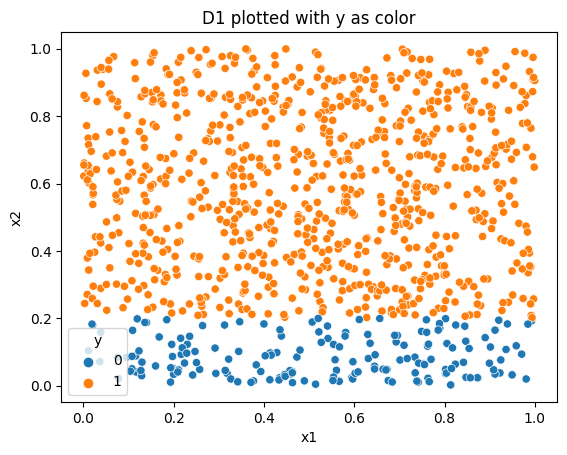

In [8]:
d1_data = pd.read_csv('./D1.txt', delim_whitespace=True, header=None, names=["x1", "x2", "y"])
sns.scatterplot(x=d1_data.x1, y=d1_data.x2, hue=d1_data.y)
plt.title("D1 plotted with y as color")

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

Text(0.5, 1.0, 'D2 plotted with y as color')

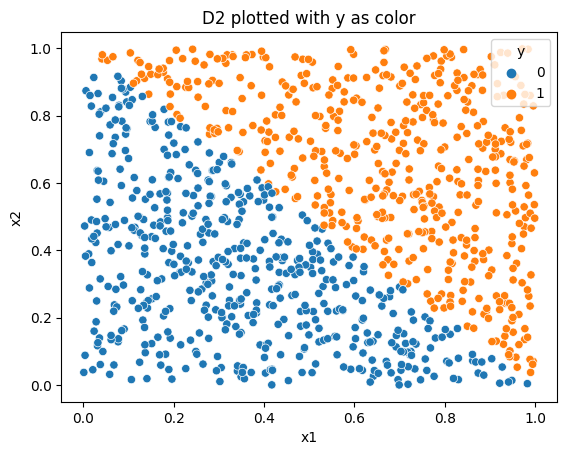

In [9]:
d2_data = pd.read_csv('./D2.txt', delim_whitespace=True, header=None, names=["x1", "x2", "y"])
sns.scatterplot(x=d2_data.x1, y=d2_data.x2, hue=d2_data.y)
plt.title("D2 plotted with y as color")

The decision boundaries differ between D1 and D2 because of the direction the decision boundary is going. In 2D space a horizontal decision boundary is very easy to represent as a cutoff of one of our variables. It is the same with a vertical decision boundary. However, a diagonal decision boundary like D2 has is much more difficult and will require "stepping" down the diagonal like a staircase as both y and x have to change again and again to create the that diagonal decision boundary. This requires a lot of leafs to manage, and is why we see the D2 tree like we did.

7. (Learning curve) [20 pts] We provide a data set Dbig.txt with 10000 labeled items. Caution: Dbig.txt is
sorted.
    - You will randomly split Dbig.txt into a candidate training set of 8192 items and a test set (the rest).
Do this by generating a random permutation, and split at 8192.
    - Generate a sequence of five nested training sets D32 ⊂ D128 ⊂ D512 ⊂ D2048 ⊂ D8192 from the
    candidate training set. The subscript n in Dn denotes training set size. The easiest way is to take
    the first n items from the (same) permutation above. This sequence simulates the real world situation
    where you obtain more and more training data.
    - For each Dn above, train a decision tree. Measure its test set error errn. Show three things in your
    answer: (1) List n, number of nodes in that tree, errn. (2) Plot n vs. errn. This is known as a learning
    curve (a single plot). (3) Visualize your decision trees’ decision boundary (five plots).

In [10]:
big = np.loadtxt("Dbig.txt", dtype=float)

X_train, X_test, y_train, y_test = train_test_split(big[:, [0,1]], big[:, -1], train_size=8192)

For split size 32, num_nodes = 15
For split size 128, num_nodes = 17
For split size 512, num_nodes = 49
For split size 2048, num_nodes = 113
For split size 8192, num_nodes = 217


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

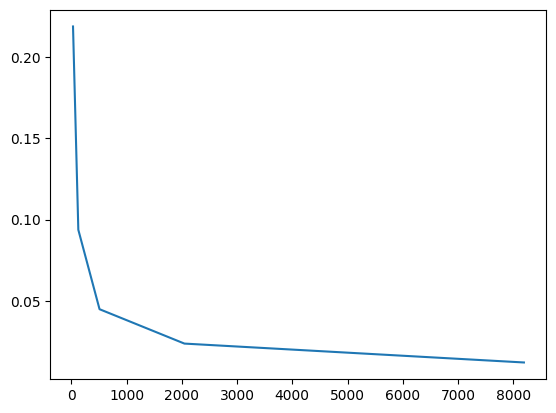

In [23]:
split_sizes = [32, 128, 512, 2048, 8192]
err_n = ([], [])
for split_size in split_sizes:
    x_train_split = X_train[0:split_size, :]
    y_train_split = y_train[0:split_size]

    x_test_split = X_test[0:split_size, :]
    y_test_split = y_test[0:split_size]

    train_data = np.append(x_train_split, np.reshape(y_train_split, (len(y_train_split), 1)), 1)

    tree_split = Tree(train_data)
    tree_split.train()
    y_pred = tree_split.predict(x_test_split)

    error = 1 - accuracy_score(y_pred, y_test_split)
    
    err_n[0].append(split_size)
    err_n[1].append(error)
    print(f"For split size {split_size}, num_nodes = {tree_split.root_node.count_nodes()}")
    # sns.scatterplot(x=x_train_split[:,0], y=x_train_split[:,1], hue=y_train_split)
    # plt.title(f"Tree decision boundary with {split_size} training data")
    # plt.show()

sns.lineplot(x=err_n[0], y=err_n[1])

For split size 32, num_nodes = 15
For split size 128, num_nodes = 17
For split size 512, num_nodes = 49
For split size 2048, num_nodes = 113
For split size 8192, num_nodes = 217


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

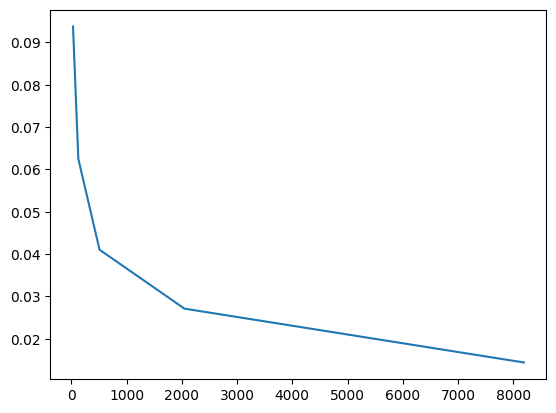

In [30]:
split_sizes = [32, 128, 512, 2048, 8192]
err_n_sklearn = ([], [])
for split_size in split_sizes:
    x_train_split = X_train[0:split_size, :]
    y_train_split = y_train[0:split_size]

    x_test_split = X_test[0:split_size, :]
    y_test_split = y_test[0:split_size]

    train_data = np.append(x_train_split, np.reshape(y_train_split, (len(y_train_split), 1)), 1)

    # tree_split = Tree(train_data)
    # tree_split.train()
    # y_pred = tree_split.predict(x_test_split)
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(x_train_split, y_train_split)
    y_pred = tree.predict(x_test_split)

    error = 1 - accuracy_score(y_pred, y_test_split)
    
    err_n_sklearn[0].append(split_size)
    err_n_sklearn[1].append(error)
    print(f"For split size {split_size}, num_nodes = {tree.tree_.node_count}")

sns.lineplot(x=err_n_sklearn[0], y=err_n_sklearn[1])

No noise, log(MSE):  320.12159991581495
Stddev: 0.0, log(MSE): 320.12159991581495
Stddev: 0.14285714285714285, log(MSE): 323.9612078984321
Stddev: 0.2857142857142857, log(MSE): 338.71787355986584
Stddev: 0.42857142857142855, log(MSE): 334.748777747632
Stddev: 0.5714285714285714, log(MSE): 336.63981180724977
Stddev: 0.7142857142857142, log(MSE): 343.69076018725525
Stddev: 0.8571428571428571, log(MSE): 332.6293423576128
Stddev: 1.0, log(MSE): 337.2251520921433
Stddev: 1.1428571428571428, log(MSE): 371.4255650764308
Stddev: 1.2857142857142856, log(MSE): 318.550092071678
Stddev: 1.4285714285714284, log(MSE): 293.5250566346035
Stddev: 1.5714285714285714, log(MSE): 318.22460840752956
Stddev: 1.7142857142857142, log(MSE): 338.521285034905
Stddev: 1.857142857142857, log(MSE): 325.4412101831646
Stddev: 2.0, log(MSE): 306.7330328996387


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Log(MSE)')

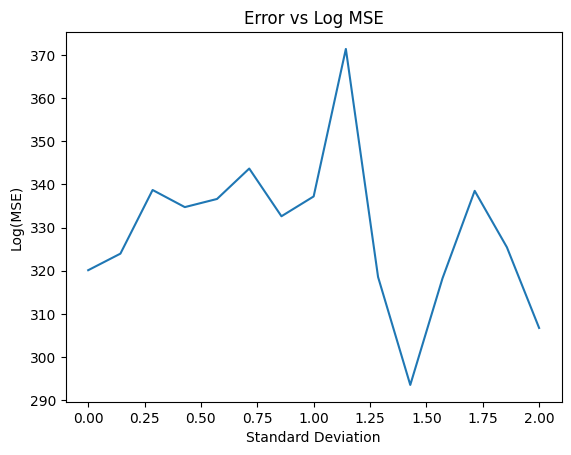

In [100]:
train_x = np.linspace(0, 10, num=100)
train_y = np.sin(train_x)

test_x = np.linspace(0, 10, num=30)
test_y = np.sin(test_x)

# Without adding noise:
poly = lagrange(x=train_x, w=train_y)
model = Polynomial(poly.coef[::-1])

pred_y = model(test_x)

mse = mean_squared_error(test_y, pred_y)
print("No noise, log(MSE): ", math.log(mse))

mu = 0
std_devs = np.linspace(0, 2, num=15)
log_errors = []

for std_dev in std_devs:
    noise = np.random.normal(mu, std_dev, size = train_x.shape)

    noisy_train_x = train_x + noise
    noisy_train_y = np.sin(noisy_train_x)

    poly = lagrange(x=noisy_train_x, w=noisy_train_y)
    model = Polynomial(poly.coef[::-1])

    pred_y = model(test_x)

    mse = mean_squared_error(test_y, pred_y)
    log_mse = math.log(mse)
    log_errors.append(log_mse)
    print(f"Stddev: {std_dev}, log(MSE):", log_mse)

sns.lineplot(x=std_devs, y=log_errors)
plt.title("Error vs Log MSE")
plt.xlabel("Standard Deviation")
plt.ylabel("Log(MSE)")

Looking at the error, it doesn't really seem like adding noise to the data really decreases the loss in all cases. The model in this case was also really unstable, so it wasn't consistent across runs. I think in general there is something true about how some of the higher std_devs was reducing noise because that was a trend I consistently saw, but it's very unconclusive looking. I almost always saw a significant dip in loss around 1.5ish std dev on reruns. I think that's fairly consistent behavior. 

I can't explain why this would be the case though. 